In [1]:
import pysindy as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Dados_1 = np.load('Ensaio_L1.npy')

In [3]:
Nt = 100
tempo = Dados_1[Nt:,0]
entrada = Dados_1[Nt:,1]
saida = Dados_1[Nt:,2]

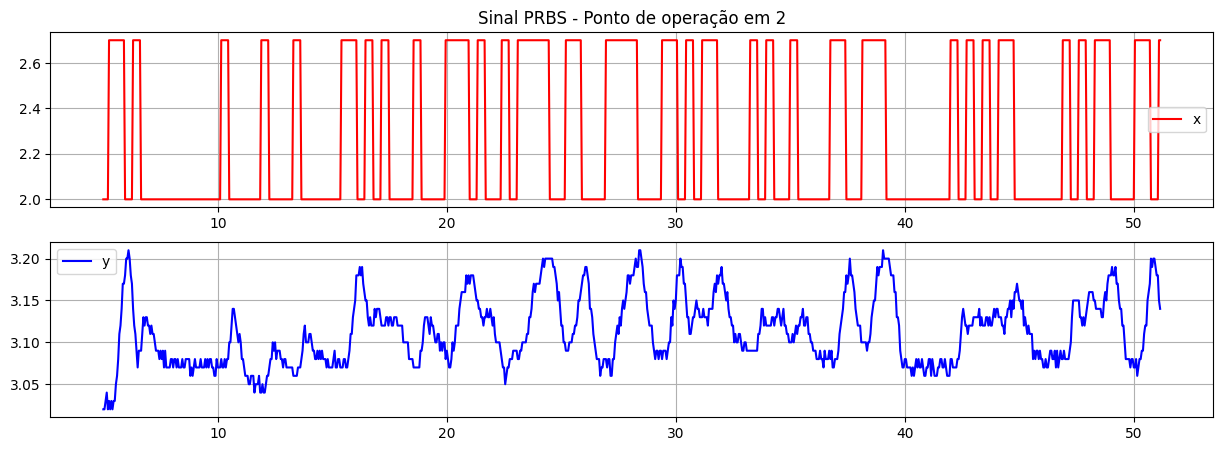

In [4]:
plt.figure(figsize=(15, 5))
plt.subplot(211)
plt.title('Sinal PRBS - Ponto de operação em 2')
plt.plot(tempo, entrada,color='r', label='x')
plt.grid()
plt.legend()
plt.subplot(212)
plt.plot(tempo, saida, color='b', label='y')
plt.grid()
plt.legend()
plt.show()

In [5]:
mu_x = np.mean(entrada)
mu_y = np.mean(saida)

x = entrada-2.35
y = saida-mu_y

Ts = 0.05 #np.mean(np.diff(tempo))

In [12]:
mu_y

3.112932900432901

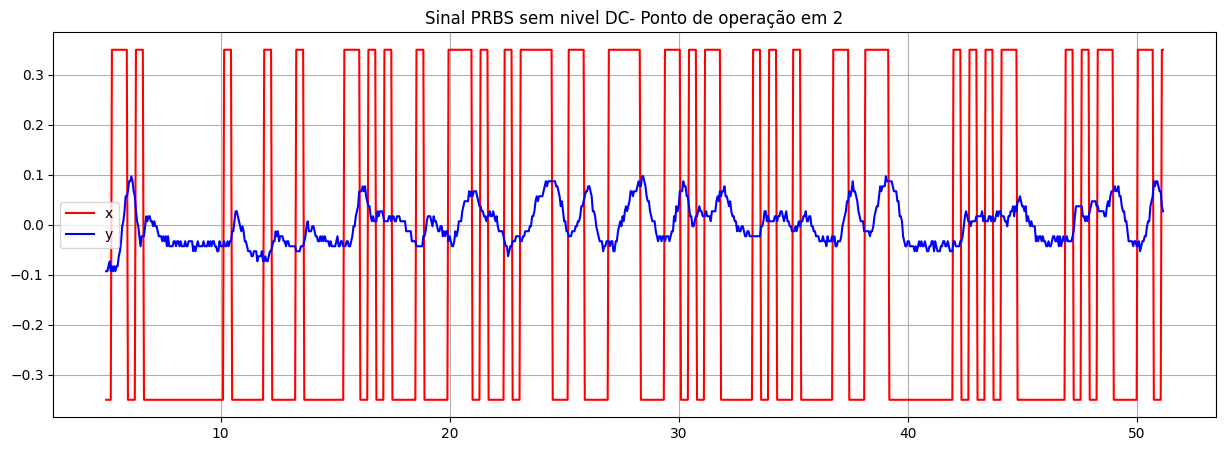

In [6]:
plt.figure(figsize=(15, 5))
plt.title('Sinal PRBS sem nivel DC- Ponto de operação em 2')
plt.plot(tempo, x,color='r', label='x')
plt.plot(tempo, y, color='b', label='y')
plt.grid()
plt.legend()
plt.show()

In [7]:
# Janela de dados de identificação e validação:
N = len(tempo)                       # nº dados totais
Ni = np.round(0.6*N).astype(int)    # nº dados identificação
ti = np.arange(0,Ni).astype(int)    # Indices identificação    
tv = np.arange(Ni,N-1).astype(int)  # Indices validação


Xi = np.column_stack((y[ti], y[ti+1]))
ui = x[ti]

Xv = np.column_stack((y[tv], y[tv+1]))
uv = x[tv]

In [34]:
modelL = ps.SINDy(t_default=Ts, 
                discrete_time=True,                 
                optimizer=ps.STLSQ(threshold=0.001),
                feature_library=ps.PolynomialLibrary(degree=1))
modelL.fit(Xi, u = ui, t = Ts)
modelL.print()

(x0)[k+1] = 1.000 x1[k]
(x1)[k+1] = 0.001 1 + 0.076 x0[k] + 0.877 x1[k] + 0.012 u0[k]


In [35]:
Xs = modelL.simulate(Xv[0,:],u = uv,t=len(uv))

yv = Xv[:,0] + mu_y
yp = Xs[:,0] + mu_y

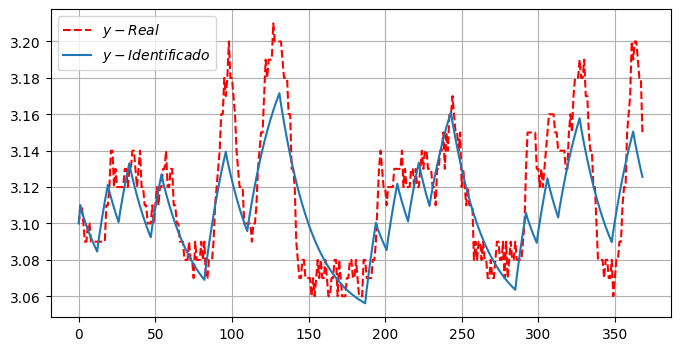

In [36]:
plt.figure(figsize=(8,4))
plt.plot(yv,ls='--', color='r')
plt.plot(yp)
plt.legend(['$y - Real$', '$y - Identificado$'])
plt.grid()

In [37]:
# Medindo o ajuste pela métrica R2:
from sklearn.metrics import r2_score as R2

FitL = R2(yv,yp)
print('Ajuste do modelo linear: ', FitL.round(2))

Ajuste do modelo linear:  0.63
